In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import NP_model


dim= 1
state_dim = 2
hidden=[16,64,64,16,dim]
range_grid=[[-1,1],[-1,1]]
num_grid=[64,64]
dx = (range_grid[0][1]-range_grid[0][0])/num_grid[0]
test_x1 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_x1 = torch.tensor(test_x1).float()
test_x1[:,1]=-0.5
test_x2 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_x2 = torch.tensor(test_x2).float()
test_x2[:,1]=0
test_x3 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_x3 = torch.tensor(test_x3).float()
test_x3[:,1]=0.5
test_y1 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_y1 = torch.tensor(test_y1).float()
test_y1[:,0]=-0.5
test_y2 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_y2 = torch.tensor(test_y2).float()
test_y2[:,0]=0
test_y3 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_y3 = torch.tensor(test_y3).float()
test_y3[:,0]=0.5
true_f = lambda u: ((1-torch.abs(u[:,0]))**2 + (1-torch.abs(u[:,1])))/10
true_g = lambda u: ((1-torch.abs(u[:,0])) + (1-torch.abs(u[:,1]))**2)/10
para1_mat = np.ndarray((1,50))
para2_mat = np.ndarray((1,50))
nonpara1_mat = np.ndarray((1001,50))
nonpara2_mat = np.ndarray((1001,50))
nonpara3_mat = np.ndarray((1001,50))
nonpara4_mat = np.ndarray((1001,50))
nonpara5_mat = np.ndarray((1001,50))
nonpara6_mat = np.ndarray((1001,50))
u_mat = np.ndarray((1,50))
for i in range(50):
    checkpoints = torch.load('checkpoint/ckpt_np2_incom_64_16_25_0.500_0.007_0.005_%d.pth'%(i))
    model_net = NP_model.NonParametricModel(dx=dx,state_dim=state_dim,hidden=hidden)
    model_net.net1.load_state_dict(checkpoints['net1'])
    para1_mat[:,i] = checkpoints['D_1'].to('cpu').detach().numpy()
    para2_mat[:,i] = checkpoints['D_2'].to('cpu').detach().numpy()
    
    non_out1 = -model_net.net1(test_x1)*0.1
    nonpara1_mat[:,i] = (non_out1[:,0].reshape(-1).detach() - true_f(test_x1)).numpy()
    non_out2 = -model_net.net1(test_x2)*0.1
    nonpara2_mat[:,i] = (non_out2[:,0].reshape(-1).detach() - true_f(test_x2)).numpy()
    non_out3 = -model_net.net1(test_x3)*0.1
    nonpara3_mat[:,i] = (non_out3[:,0].reshape(-1).detach() - true_f(test_x3)).numpy()
    
    non_out4 = -model_net.net1(test_y1)*0.1
    nonpara4_mat[:,i] = (non_out4[:,0].reshape(-1).detach() - true_f(test_y1)).numpy()
    non_out5 = -model_net.net1(test_y2)*0.1
    nonpara5_mat[:,i] = (non_out5[:,0].reshape(-1).detach() - true_f(test_y2)).numpy()
    non_out6 = -model_net.net1(test_y3)*0.1
    nonpara6_mat[:,i] = (non_out6[:,0].reshape(-1).detach() - true_f(test_y3)).numpy()
    u_mat[:,i] = checkpoints['u_loss']
    
bias1 = (np.mean(para1_mat,axis=1) - 7e-3)
std1 = np.sqrt(np.mean(np.square(para1_mat - np.mean(para1_mat,axis=1)),axis=1))
mse1 = np.sqrt(bias1**2 + std1**2)
bias2 = (np.mean(para2_mat,axis=1) - 5.33e-3)
std2 = np.sqrt(np.mean(np.square(para2_mat - np.mean(para2_mat,axis=1)),axis=1))
mse2 = np.sqrt(bias2**2 + std2**2)
mse = np.sqrt(mse1**2 + mse2**2)
bias1_non = np.sqrt(np.mean(np.square(np.mean(nonpara1_mat,axis=1))))
std1_non = np.sqrt(np.mean(np.square(nonpara1_mat -np.mean(nonpara1_mat,axis=1,keepdims=True))))
rmse1_non = np.sqrt(bias1_non**2 + std1_non**2)
bias2_non = np.sqrt(np.mean(np.square(np.mean(nonpara2_mat,axis=1))))
std2_non = np.sqrt(np.mean(np.square(nonpara2_mat -np.mean(nonpara2_mat,axis=1,keepdims=True))))
rmse2_non = np.sqrt(bias2_non**2 + std2_non**2)
bias3_non = np.sqrt(np.mean(np.square(np.mean(nonpara3_mat,axis=1))))
std3_non = np.sqrt(np.mean(np.square(nonpara3_mat -np.mean(nonpara3_mat,axis=1,keepdims=True))))
rmse3_non = np.sqrt(bias3_non**2 + std3_non**2)
bias4_non = np.sqrt(np.mean(np.square(np.mean(nonpara4_mat,axis=1))))
std4_non = np.sqrt(np.mean(np.square(nonpara4_mat -np.mean(nonpara4_mat,axis=1,keepdims=True))))
rmse4_non = np.sqrt(bias4_non**2 + std4_non**2)
bias5_non = np.sqrt(np.mean(np.square(np.mean(nonpara5_mat,axis=1))))
std5_non = np.sqrt(np.mean(np.square(nonpara5_mat -np.mean(nonpara5_mat,axis=1,keepdims=True))))
rmse5_non = np.sqrt(bias5_non**2 + std5_non**2)
bias6_non = np.sqrt(np.mean(np.square(np.mean(nonpara6_mat,axis=1))))
std6_non = np.sqrt(np.mean(np.square(nonpara6_mat -np.mean(nonpara6_mat,axis=1,keepdims=True))))
rmse6_non = np.sqrt(bias6_non**2 + std6_non**2)
rmse_u = np.sqrt(np.mean(u_mat,axis=1))
print('bias for D1: %.5fe-5'%(bias1*1e5))
print('bias for D2: %.5fe-5'%(bias2*1e5))
print('std for D1: %.5fe-5'%(std1*1e5))
print('std for D2: %.5fe-5'%(std2*1e5))
print('rmse for D1: %.5fe-5'%(mse1*1e5))
print('rmse for D2: %.5fe-5'%(mse2*1e5))
print('rmse for D: %.5fe-5'%(mse*1e5))
print('bias for f with w=-0.5: %.5fe-5'%(bias1_non*1e5))
print('std for f with w=-0.5: %.5fe-5'%(std1_non*1e5))
print('rmse for f with w=-0.5: %.5fe-5'%(rmse1_non*1e5))
print('bias for f with w=0: %.5fe-5'%(bias2_non*1e5))
print('std for f with w=0: %.5fe-5'%(std2_non*1e5))
print('rmse for f with w=0: %.5fe-5'%(rmse2_non*1e5))
print('bias for f with w=0.5: %.5fe-5'%(bias3_non*1e5))
print('std for f with w=0.5: %.5fe-5'%(std3_non*1e5))
print('rmse for f with w=0.5: %.5fe-5'%(rmse3_non*1e5))
print('bias for f with u=-0.5: %.5fe-5'%(bias4_non*1e5))
print('std for f with u=-0.5: %.5fe-5'%(std4_non*1e5))
print('rmse for f with u=-0.5: %.5fe-5'%(rmse4_non*1e5))
print('bias for f with u=0: %.5fe-5'%(bias5_non*1e5))
print('std for f with u=0: %.5fe-5'%(std5_non*1e5))
print('rmse for f with u=0: %.5fe-5'%(rmse5_non*1e5))
print('bias for f with u=0.5: %.5fe-5'%(bias6_non*1e5))
print('std for f with u=0.5: %.5fe-5'%(std6_non*1e5))
print('rmse for f with u=0.5: %.5fe-5'%(rmse6_non*1e5))
print('rmse for u:%.5fe-5'%(rmse_u*1e5))

/home/yuanyuanbenben/anaconda3/envs/nnbase/lib/python3.8/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
/tmp/ipykernel_169254/2541652344.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted

bias for D1: 381.25942e-5
bias for D2: 7772.20743e-5
std for D1: 57.45733e-5
std for D2: 359.59669e-5
rmse for D1: 385.56464e-5
rmse for D2: 7780.52171e-5
rmse for D: 7790.06921e-5
bias for f with w=-0.5: 8882.32656e-5
std for f with w=-0.5: 717.26090e-5
rmse for f with w=-0.5: 8911.23944e-5
bias for f with w=0: 13664.27196e-5
std for f with w=0: 516.54781e-5
rmse for f with w=0: 13674.03196e-5
bias for f with w=0.5: 8830.17288e-5
std for f with w=0.5: 664.82540e-5
rmse for f with w=0.5: 8855.16493e-5
bias for f with u=-0.5: 8058.28384e-5
std for f with u=-0.5: 658.98042e-5
rmse for f with u=-0.5: 8085.18359e-5
bias for f with u=0: 15278.46436e-5
std for f with u=0: 550.77025e-5
rmse for f with u=0: 15288.38844e-5
bias for f with u=0.5: 8021.92036e-5
std for f with u=0.5: 729.81422e-5
rmse for f with u=0.5: 8055.05028e-5
rmse for u:17078.64655e-5


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import PINN_model


dim= 2
state_dim = 2
hidden=[16,64,16,dim]
range_grid=[[-1,1],[-1,1]]
num_grid=[64,64]
dx = (range_grid[0][1]-range_grid[0][0])/num_grid[0]
test_x1 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_x1 = torch.tensor(test_x1).float()
test_x1[:,1]=-0.5
test_x2 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_x2 = torch.tensor(test_x2).float()
test_x2[:,1]=0
test_x3 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_x3 = torch.tensor(test_x3).float()
test_x3[:,1]=0.5
test_y1 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_y1 = torch.tensor(test_y1).float()
test_y1[:,0]=-0.5
test_y2 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_y2 = torch.tensor(test_y2).float()
test_y2[:,0]=0
test_y3 = np.repeat(np.linspace(-1,1,1001,endpoint=True).reshape(1001,1),2,axis=1)
test_y3 = torch.tensor(test_y3).float()
test_y3[:,0]=0.5
true_f = lambda u: ((1-torch.abs(u[:,0]))**2 + (1-torch.abs(u[:,1])))/10
true_g = lambda u: ((1-torch.abs(u[:,0])) + (1-torch.abs(u[:,1]))**2)/10
para1_mat = np.ndarray((1,50))
para2_mat = np.ndarray((1,50))
nonpara1_mat = np.ndarray((1001,50))
nonpara2_mat = np.ndarray((1001,50))
nonpara3_mat = np.ndarray((1001,50))
nonpara4_mat = np.ndarray((1001,50))
nonpara5_mat = np.ndarray((1001,50))
nonpara6_mat = np.ndarray((1001,50))
u_mat = np.ndarray((1,50))
for i in range(50):
    checkpoints = torch.load('checkpoint/ckpt_np_pinn_64_16_25_0.500_0.007_0.005_%d.pth'%(i))
    model_net = PINN_model.NPEquation(state_dim=state_dim,hidden=hidden)
    model_net.net.load_state_dict(checkpoints['PDE_model_net'])
    para1_mat[:,i] = checkpoints['D_1'].to('cpu').detach().numpy()
    para2_mat[:,i] = checkpoints['D_2'].to('cpu').detach().numpy()
    
    non_out1 = -model_net.net(test_x1)*0.01
    nonpara1_mat[:,i] = (non_out1[:,0].reshape(-1).detach() - true_f(test_x1)).cpu().numpy()
    non_out2 = -model_net.net(test_x2)*0.01
    nonpara2_mat[:,i] = (non_out2[:,0].reshape(-1).detach() - true_f(test_x2)).cpu().numpy()
    non_out3 = -model_net.net(test_x3)*0.01
    nonpara3_mat[:,i] = (non_out3[:,0].reshape(-1).detach() - true_f(test_x3)).cpu().numpy()
    
    non_out4 = -model_net.net(test_y1)*0.01
    nonpara4_mat[:,i] = (non_out4[:,0].reshape(-1).detach() - true_f(test_y1)).cpu().numpy()
    non_out5 = -model_net.net(test_y2)*0.01
    nonpara5_mat[:,i] = (non_out5[:,0].reshape(-1).detach() - true_f(test_y2)).cpu().numpy()
    non_out6 = -model_net.net(test_y3)*0.01
    nonpara6_mat[:,i] = (non_out6[:,0].reshape(-1).detach() - true_f(test_y3)).cpu().numpy()
    u_mat[:,i] = checkpoints['u_loss']
    
bias1 = (np.mean(para1_mat,axis=1) - 7e-3)
std1 = np.sqrt(np.mean(np.square(para1_mat - np.mean(para1_mat,axis=1)),axis=1))
mse1 = np.sqrt(bias1**2 + std1**2)
bias2 = (np.mean(para2_mat,axis=1) - 5.33e-3)
std2 = np.sqrt(np.mean(np.square(para2_mat - np.mean(para2_mat,axis=1)),axis=1))
mse2 = np.sqrt(bias2**2 + std2**2)
mse = np.sqrt(mse1**2 + mse2**2)
bias1_non = np.sqrt(np.mean(np.square(np.mean(nonpara1_mat,axis=1))))
std1_non = np.sqrt(np.mean(np.square(nonpara1_mat -np.mean(nonpara1_mat,axis=1,keepdims=True))))
rmse1_non = np.sqrt(bias1_non**2 + std1_non**2)
bias2_non = np.sqrt(np.mean(np.square(np.mean(nonpara2_mat,axis=1))))
std2_non = np.sqrt(np.mean(np.square(nonpara2_mat -np.mean(nonpara2_mat,axis=1,keepdims=True))))
rmse2_non = np.sqrt(bias2_non**2 + std2_non**2)
bias3_non = np.sqrt(np.mean(np.square(np.mean(nonpara3_mat,axis=1))))
std3_non = np.sqrt(np.mean(np.square(nonpara3_mat -np.mean(nonpara3_mat,axis=1,keepdims=True))))
rmse3_non = np.sqrt(bias3_non**2 + std3_non**2)
bias4_non = np.sqrt(np.mean(np.square(np.mean(nonpara4_mat,axis=1))))
std4_non = np.sqrt(np.mean(np.square(nonpara4_mat -np.mean(nonpara4_mat,axis=1,keepdims=True))))
rmse4_non = np.sqrt(bias4_non**2 + std4_non**2)
bias5_non = np.sqrt(np.mean(np.square(np.mean(nonpara5_mat,axis=1))))
std5_non = np.sqrt(np.mean(np.square(nonpara5_mat -np.mean(nonpara5_mat,axis=1,keepdims=True))))
rmse5_non = np.sqrt(bias5_non**2 + std5_non**2)
bias6_non = np.sqrt(np.mean(np.square(np.mean(nonpara6_mat,axis=1))))
std6_non = np.sqrt(np.mean(np.square(nonpara6_mat -np.mean(nonpara6_mat,axis=1,keepdims=True))))
rmse6_non = np.sqrt(bias6_non**2 + std6_non**2)
rmse_u = np.sqrt(np.mean(u_mat,axis=1))
print('bias for D1: %.5fe-5'%(bias1*1e5))
print('bias for D2: %.5fe-5'%(bias2*1e5))
print('std for D1: %.5fe-5'%(std1*1e5))
print('std for D2: %.5fe-5'%(std2*1e5))
print('rmse for D1: %.5fe-5'%(mse1*1e5))
print('rmse for D2: %.5fe-5'%(mse2*1e5))
print('rmse for D: %.5fe-5'%(mse*1e5))
print('bias for f with w=-0.5: %.5fe-5'%(bias1_non*1e5))
print('std for f with w=-0.5: %.5fe-5'%(std1_non*1e5))
print('rmse for f with w=-0.5: %.5fe-5'%(rmse1_non*1e5))
print('bias for f with w=0: %.5fe-5'%(bias2_non*1e5))
print('std for f with w=0: %.5fe-5'%(std2_non*1e5))
print('rmse for f with w=0: %.5fe-5'%(rmse2_non*1e5))
print('bias for f with w=0.5: %.5fe-5'%(bias3_non*1e5))
print('std for f with w=0.5: %.5fe-5'%(std3_non*1e5))
print('rmse for f with w=0.5: %.5fe-5'%(rmse3_non*1e5))
print('bias for f with u=-0.5: %.5fe-5'%(bias4_non*1e5))
print('std for f with u=-0.5: %.5fe-5'%(std4_non*1e5))
print('rmse for f with u=-0.5: %.5fe-5'%(rmse4_non*1e5))
print('bias for f with u=0: %.5fe-5'%(bias5_non*1e5))
print('std for f with u=0: %.5fe-5'%(std5_non*1e5))
print('rmse for f with u=0: %.5fe-5'%(rmse5_non*1e5))
print('bias for f with u=0.5: %.5fe-5'%(bias6_non*1e5))
print('std for f with u=0.5: %.5fe-5'%(std6_non*1e5))
print('rmse for f with u=0.5: %.5fe-5'%(rmse6_non*1e5))
print('rmse for u:%.5fe-5'%(rmse_u*1e5))

/tmp/ipykernel_88582/4182771163.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoints = torch.load('checkpoint/ckpt_np_pinn_64_16_25_0.500_0.007_0.005_%d.pth'%(i)

bias for D1: -546.58566e-5
bias for D2: 1084.08591e-5
std for D1: 435.70785e-5
std for D2: 1111.27991e-5
rmse for D1: 698.99730e-5
rmse for D2: 1552.47715e-5
rmse for D: 1702.58113e-5
bias for f with w=-0.5: 13038.34790e-5
std for f with w=-0.5: 3841.66865e-5
rmse for f with w=-0.5: 13592.53229e-5
bias for f with w=0: 18093.26281e-5
std for f with w=0: 3985.20721e-5
rmse for f with w=0: 18526.95430e-5
bias for f with w=0.5: 13305.71295e-5
std for f with w=0.5: 4181.69916e-5
rmse for f with w=0.5: 13947.35118e-5
bias for f with u=-0.5: 12233.30219e-5
std for f with u=-0.5: 4055.95136e-5
rmse for f with u=-0.5: 12888.15052e-5
bias for f with u=0: 19902.34524e-5
std for f with u=0: 4167.36256e-5
rmse for f with u=0: 20333.96805e-5
bias for f with u=0.5: 12468.55841e-5
std for f with u=0.5: 4084.95875e-5
rmse for f with u=0.5: 13120.66450e-5
rmse for u:16662.28722e-5


In [11]:
checkpoints = torch.load('checkpoint/ckpt_np2_pinn_64_16_25_0.100_0.007_0.005_%d.pth'%(0))
print(checkpoints)

/tmp/ipykernel_88582/2305397389.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoints = torch.load('checkpoint/ckpt_np2_pinn_64_16_25_0.100_0.007_0.005_%d.pth'%(0)

{'solution_net': OrderedDict([('net.0linear.weight', tensor([[-0.0530, -0.0226, -0.2231],
        [-0.0317,  0.3615, -0.0983],
        [-0.0337, -0.1211, -0.1034],
        [-0.0031, -0.3170,  0.1411],
        [ 0.0817,  0.1219, -0.3761],
        [ 0.1470, -0.1294, -0.0665],
        [-0.0813, -0.1389,  0.2701],
        [-0.2495,  0.1422,  0.4910],
        [ 0.0232, -0.0154, -0.0871],
        [ 0.0825,  0.3828,  0.0044],
        [-0.0039, -0.1778, -0.3564],
        [ 0.0329, -0.4373,  0.2182],
        [ 0.0267, -0.1737,  0.0675],
        [-0.0780, -0.2855, -0.2214],
        [ 0.1055,  0.3132,  0.0991],
        [-0.0322, -0.1153,  0.2319],
        [-0.0429, -0.2309,  0.1742],
        [-0.0468,  0.0477, -0.1751],
        [-0.3733, -0.5731,  0.2514],
        [ 0.0069,  0.1183,  0.0712],
        [ 0.0713, -0.1620, -0.1628],
        [-0.1069,  0.1129, -0.1015],
        [ 0.1011,  0.3279,  0.2951],
        [-0.0309, -0.4158, -0.2815],
        [ 0.0533,  0.1841, -0.4622],
        [ 0.0059,  0.1

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import GFN_model


u_mat = np.ndarray((1,50))
for i in range(50):
    checkpoints = torch.load('checkpoint/ckpt_np2_nonpara_64_16_25_0.500_0.007_0.005_%d.pth'%(i))

    u_mat[:,i] = checkpoints['u_loss']

rmse_u = np.sqrt(np.mean(u_mat))

print('rmse for u: %.5fe-5'%(rmse_u*1e5))

/tmp/ipykernel_130172/1158678451.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoints = torch.load('checkpoint/ckpt_np2_nonpara_64_16_25_0.500_0.007_0.005_%d.pth

rmse for u: 7165.39199e-5


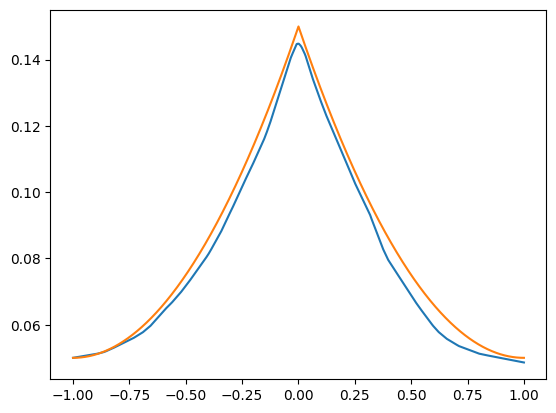

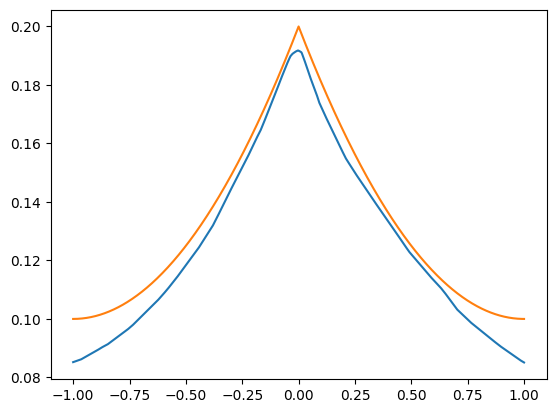

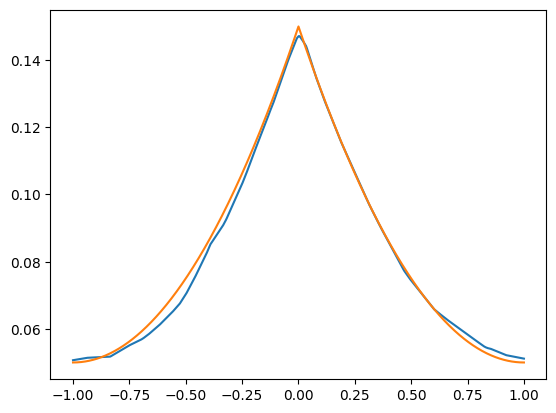

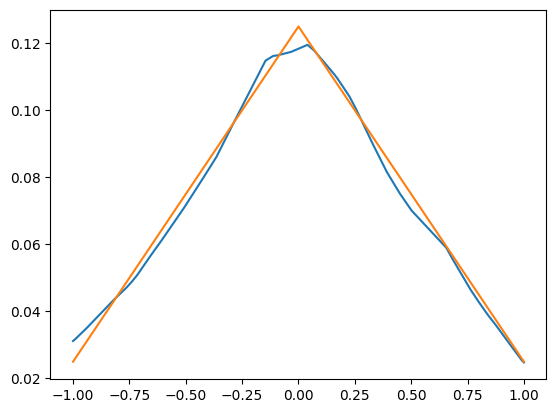

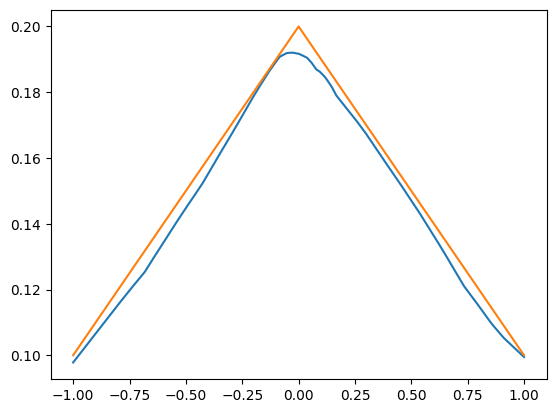

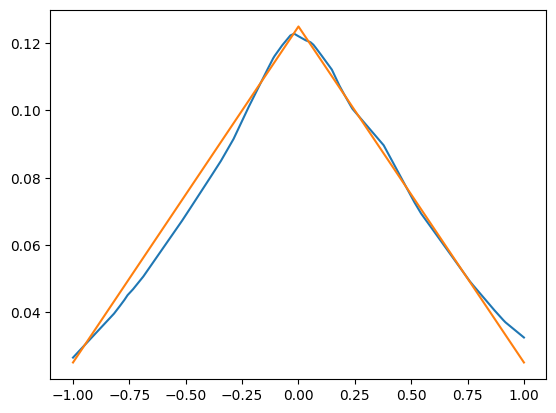

In [2]:
plt.plot(test_x1[:,0],non_out1[:,0].reshape(-1).detach(),test_x1[:,0],true_f(test_x1))
plt.show()
plt.plot(test_x2[:,0],non_out2[:,0].reshape(-1).detach(),test_x2[:,0],true_f(test_x2))
plt.show()
plt.plot(test_x3[:,0],non_out3[:,0].reshape(-1).detach(),test_x3[:,0],true_f(test_x3))
plt.show()
plt.plot(test_y1[:,1],non_out4[:,0].reshape(-1).detach(),test_y1[:,1],true_f(test_y1))
plt.show()
plt.plot(test_y2[:,1],non_out5[:,0].reshape(-1).detach(),test_y2[:,1],true_f(test_y2))
plt.show()
plt.plot(test_y3[:,1],non_out6[:,0].reshape(-1).detach(),test_y3[:,1],true_f(test_y3))
plt.show()